In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def morse(r, re, D, a):    
    return D*np.square(1-np.exp(-a*(r-re)))-D

def lennardJones(r, re, D):    
    return D*(np.power(re/r,12)-2*np.power(re/r,6))

LennardJones potential - depth D and distance re imply a spring constant k
Morse potential        - spring constant k can be selected independently


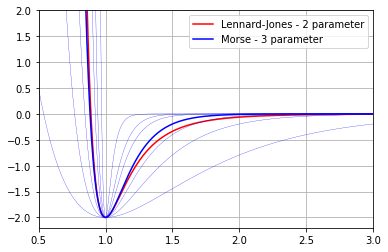

In [3]:
x=np.linspace(0.25,3,1000)
D = 2.0
re= 1.0
k = 2*D*np.square(6/re)   # k-fixed so Morse and LennardJones fit together
a = np.sqrt(k/(2*D))
print('LennardJones potential - depth D and distance re imply a spring constant k')
print('Morse potential        - spring constant k can be selected independently')

plt.plot(x,lennardJones(x, re, D),color='red',label="Lennard-Jones - 2 parameter");
plt.plot(x,morse(x, re, D, a),color='blue',label="Morse - 3 parameter");
for aa in a*np.array([4,2,1.5,0.75,0.5,0.25]):
    plt.plot(x,morse(x, re, D, aa),linewidth=0.25,color='blue');
plt.ylim(-1.1*D,D);
plt.xlim(0.5*re,3*re);
plt.grid(True);
plt.legend();

In [4]:
def potential(spec1, spec2, rVec):
    re,D,a=1,2,2
    r=np.sqrt(np.sum(np.square(rVec)))
    return morse(r, re, D, a)

def calcForce(part1,part2,eps = 0.001):
    rVec12 = part1['pos']-part2['pos']

    potInc = potential(part1['type'],part2['type'],rVec12*(1+eps,1,1))
    potDec = potential(part1['type'],part2['type'],rVec12*(1-eps,1,1))
    fx = (potInc-potDec)/(2*eps)
    
    potInc = potential(part1['type'],part2['type'],rVec12*(1,1+eps,1))
    potDec = potential(part1['type'],part2['type'],rVec12*(1,1-eps,1))
    fy = (potInc-potDec)/(2*eps)
    
    potInc = potential(part1['type'],part2['type'],rVec12*(1,1,1+eps))
    potDec = potential(part1['type'],part2['type'],rVec12*(1,1,1-eps))
    fz = (potInc-potDec)/(2*eps)
    
    fVec = -np.array([fx,fy,fz]) #F=-grad V
    fabs = np.sqrt(np.sum(np.square(fVec)))
    return fVec,fabs
    
def updatePos(pos,fResVec,eps=0.01):
    pos = pos + fResVec*eps
    return pos

def calcCenterOfMass(parts):
    centerOfMass = np.zeros(3)
    mTot = 0
    for p in parts:
        m = massDict[p['type']]
        mTot = mTot+m
        centerOfMass = centerOfMass + p['pos']*m
    return centerOfMass/mTot

def plotPart(parts, figSize = 5):
    fig, ax = plt.subplots()
    x=[p['pos'][0] for p in parts]
    y=[p['pos'][1] for p in parts]
    for p1 in parts:
        for p2 in parts:
            rVec12 = p1['pos']-p2['pos']
            r12 = np.sqrt(np.sum(np.square(rVec12)))
            if 0<r12<2:
                plt.plot([p1['pos'][0],p2['pos'][0]],[p1['pos'][1],p2['pos'][1]],color='black')
    plt.plot(x,y,'ro')   #plot particles
    plt.xlim(-figSize,figSize)
    plt.ylim(-figSize,figSize)
    ax.set_aspect(1)
    plt.grid(True)
    return 

0 

[{'id': 0, 'type': 'O', 'pos': array([0, 0, 0])},
 {'id': 1, 'type': 'H', 'pos': array([1.03432558, 0.        , 0.        ])},
 {'id': 2, 'type': 'H', 'pos': array([-0.03786234,  0.87997362,  0.        ])}]

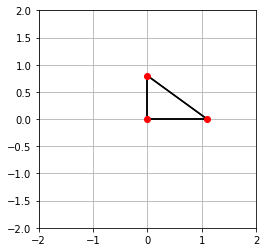

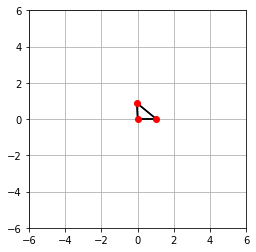

In [5]:
part1 = {'id':0,'type':'O','pos':np.array([0,0,0])}
part2 = {'id':1,'type':'H','pos':np.array([1.1,0,0])}
part3 = {'id':2,'type':'H','pos':np.array([0,0.8,0])}


massDict = {'O':16,'H':1}
parts = [part1,part2,part3]
plotPart(parts, 2)

for k in range(1):
    print(k,end=' ')
    fResVecAll = np.zeros((len(parts),len(parts),3))
    for p1 in parts:
        for p2 in parts:
            if p1['id']  != p2['id']:
                fVec,fabs = calcForce(p1,p2)
                fResVecAll[p1['id'],p2['id']]=fVec
    fMax = np.max(np.abs(fResVecAll))
    if fMax<0.00001:
        break
    fResVecAll = fResVecAll/fMax*0.1
    #print(np.max(fResVecAll))

    for p1 in parts:
        fResVec = np.zeros(3)
        for p2 in parts:
            fResVec = fResVec + fResVecAll[p1['id'],p2['id'],:]

        if p1['id'] == 0:
            p1['pos'] = p1['pos']
        elif p1['id'] == 1:
            #print(fResVec,np.array([1,0,0]))
            p1['pos'] = updatePos(p1['pos'],fResVec*np.array([1,0,0]), eps=1)
        else:
            p1['pos'] = updatePos(p1['pos'],fResVec, eps=1)
    
plotPart(parts, figSize = 6)
parts

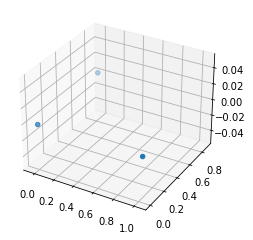

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=[p['pos'][0] for p in parts]
y=[p['pos'][1] for p in parts]
z=[p['pos'][2] for p in parts]

ax.scatter(x,y,z)